In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df.shape

(17966, 9)

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17966.0,2016.866470,2.050336,1996.0,2016.0,2017.0,2018.0,2060.0
price,17966.0,12279.534844,4741.343657,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17966.0,23362.608761,19472.054349,1.0,9987.0,18242.5,31060.0,177644.0
tax,17966.0,113.329456,62.012456,0.0,30.0,145.0,145.0,580.0
mpg,17966.0,57.906980,10.125696,20.8,52.3,58.9,65.7,201.8
engineSize,17966.0,1.350807,0.432367,0.0,1.0,1.2,1.5,5.0


# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

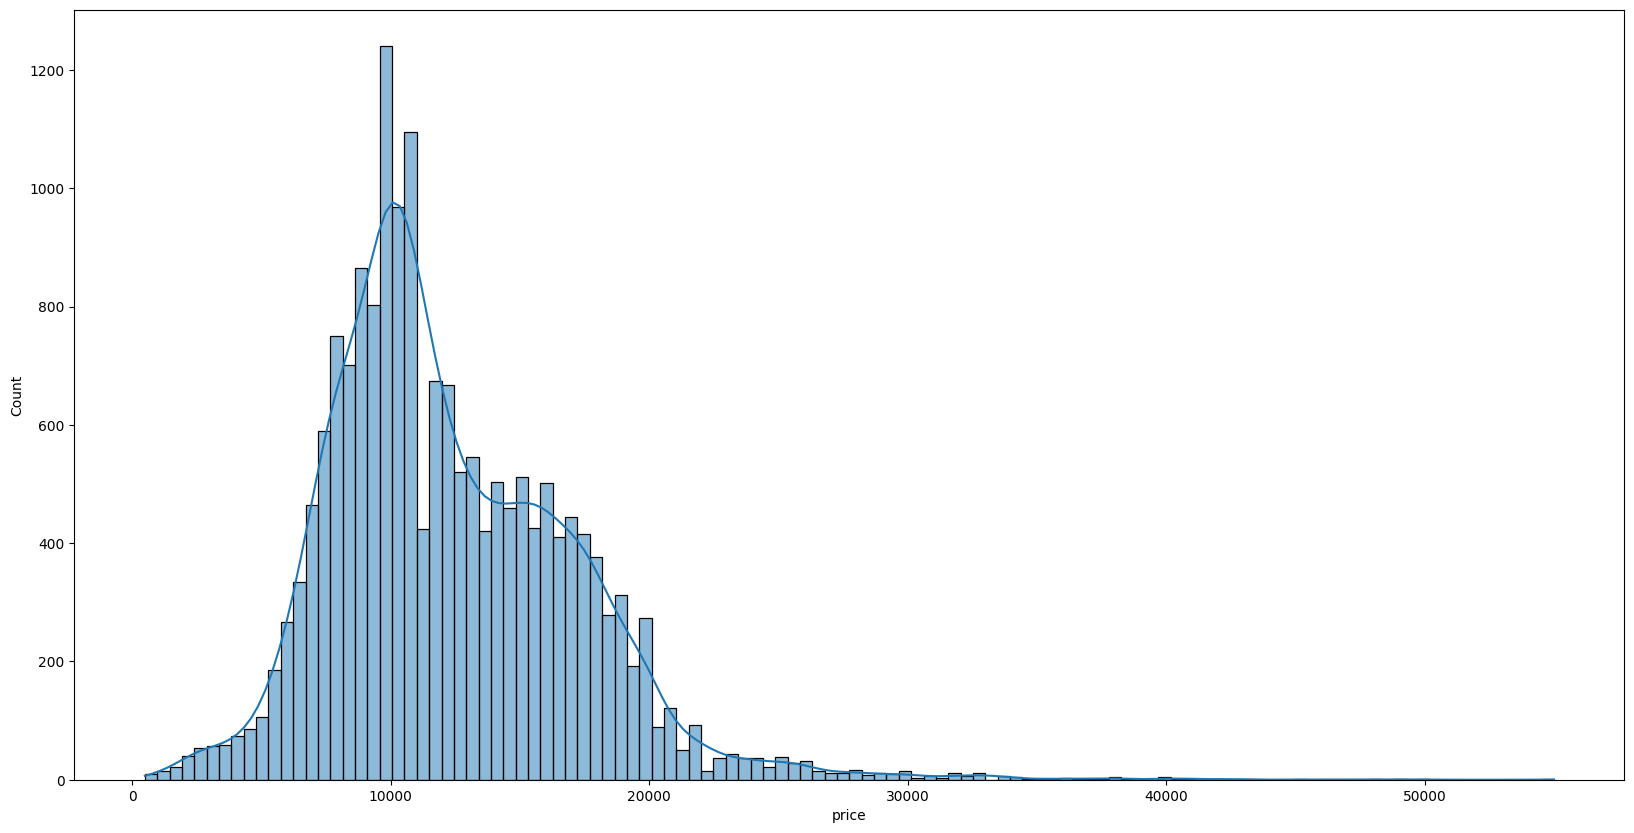

In [10]:
plt.figure(figsize = (20,10))
sns.histplot(data = df['price'], kde = True)

In [11]:
df.year.value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

In [12]:
df = df.drop(df[df.year > 2024].index)

In [13]:
df.year.value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

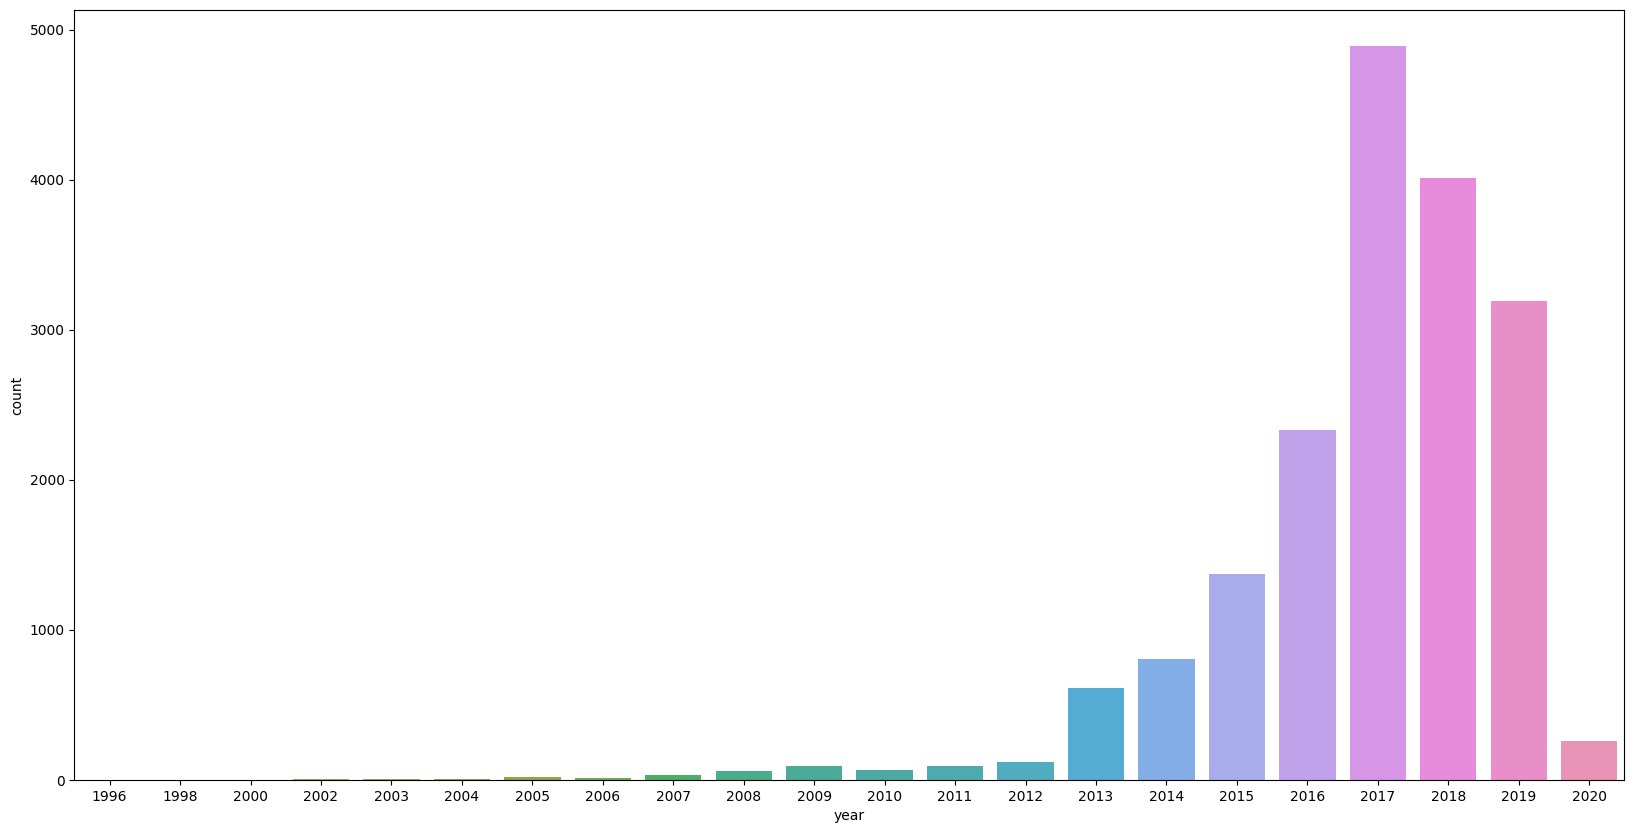

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(df, x= "year")

In [15]:
df.transmission.value_counts()

transmission
Manual       15518
Automatic     1360
Semi-Auto     1087
Name: count, dtype: int64

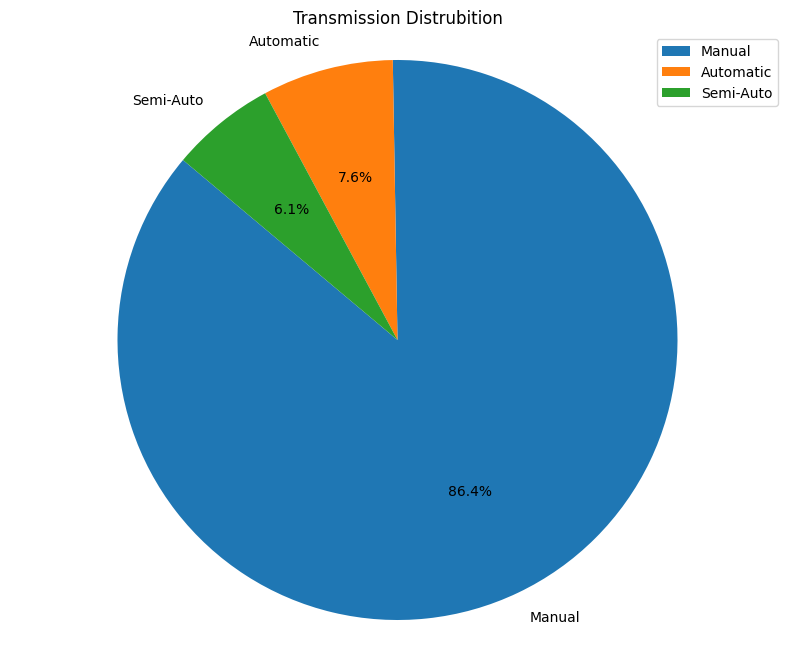

In [16]:
transmission_counts = df['transmission'].value_counts()

plt.figure(figsize = (10,8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Transmission Distrubition")

plt.legend(transmission_counts.index, loc="best")

<Axes: xlabel='transmission', ylabel='count'>

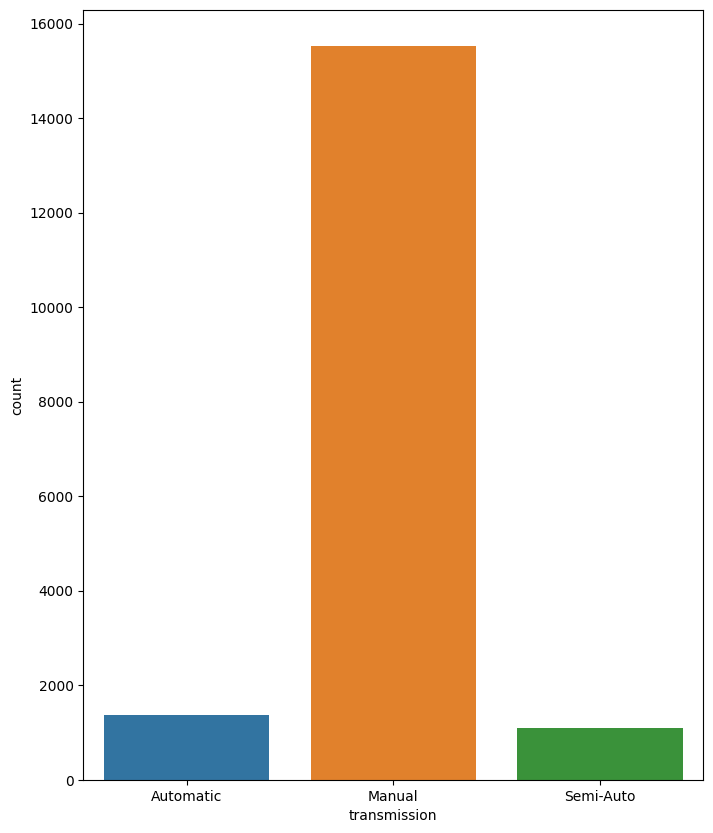

In [17]:
plt.figure(figsize=(8,10))
sns.countplot(df, x= "transmission")

In [18]:
df.model.value_counts()

model
 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

<Axes: xlabel='model', ylabel='count'>

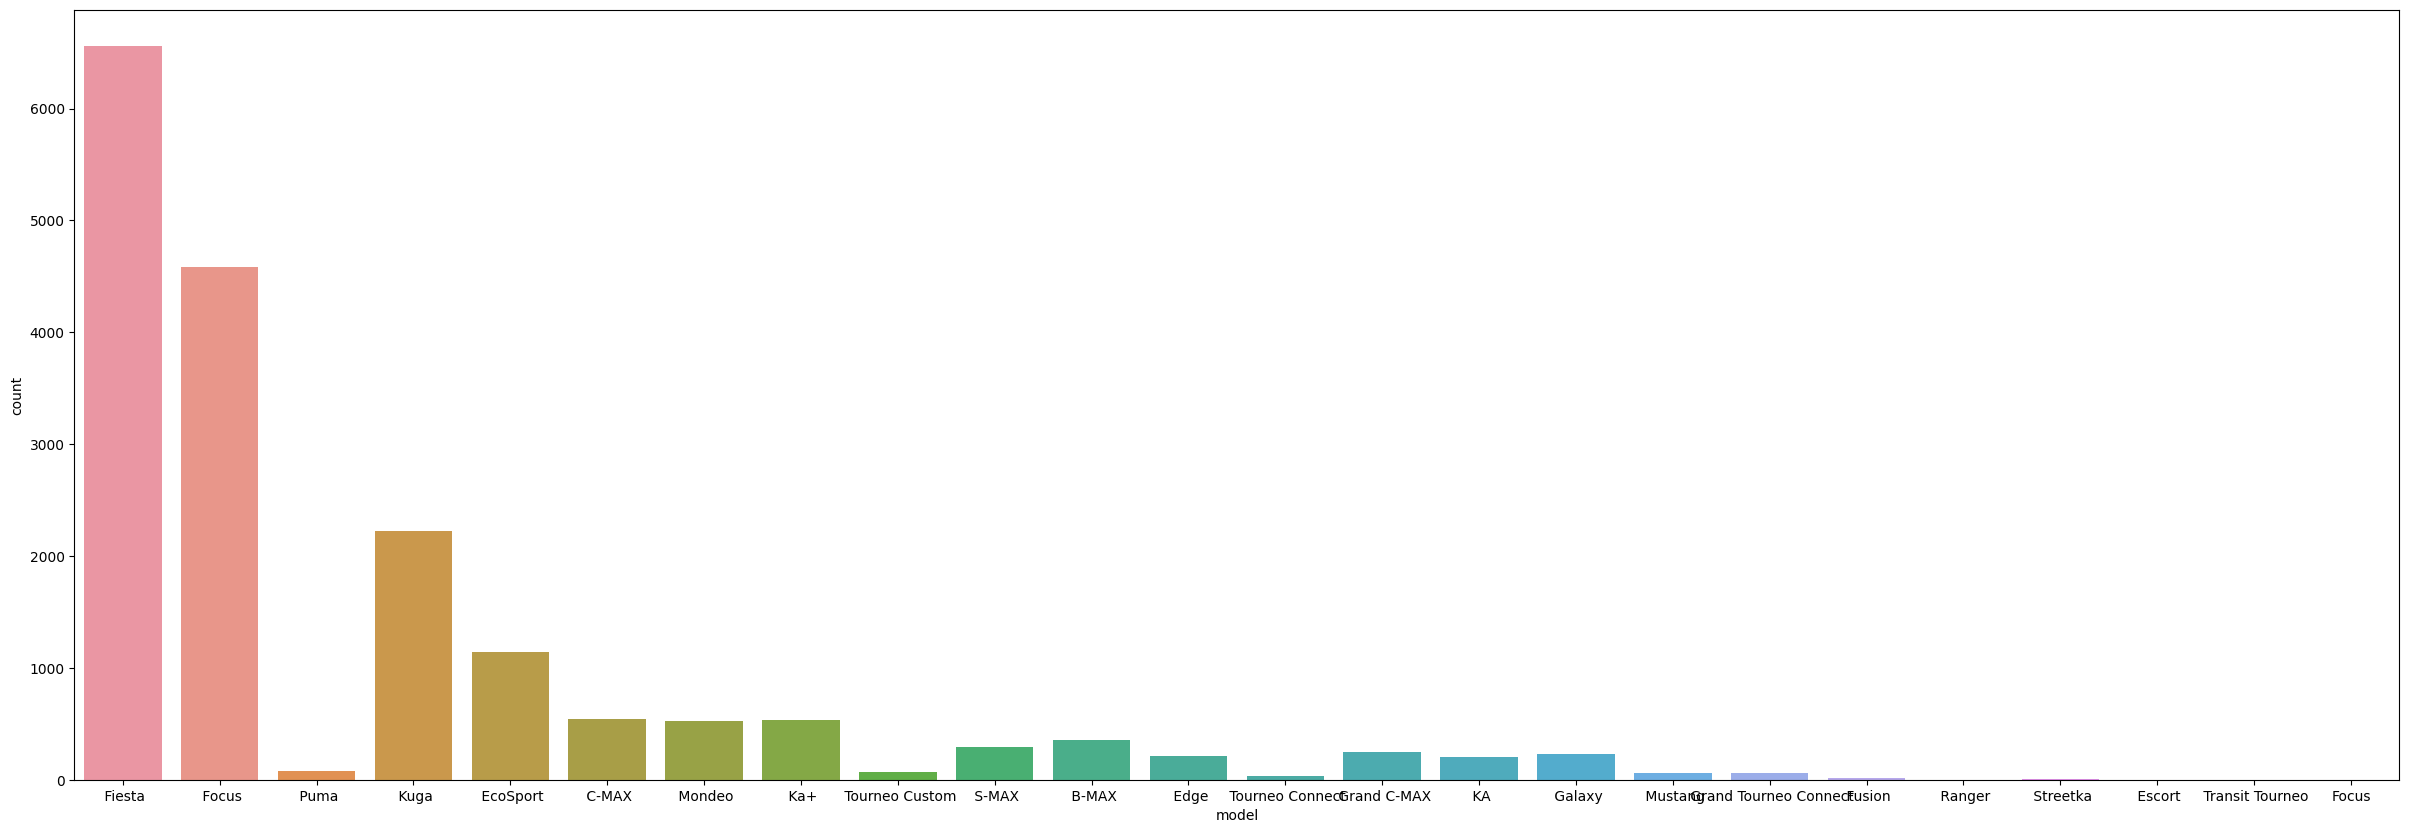

In [19]:
plt.figure(figsize = (30,10))
sns.countplot(df, x = "model")

In [20]:
df.fuelType.value_counts()

fuelType
Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

<Axes: xlabel='fuelType', ylabel='count'>

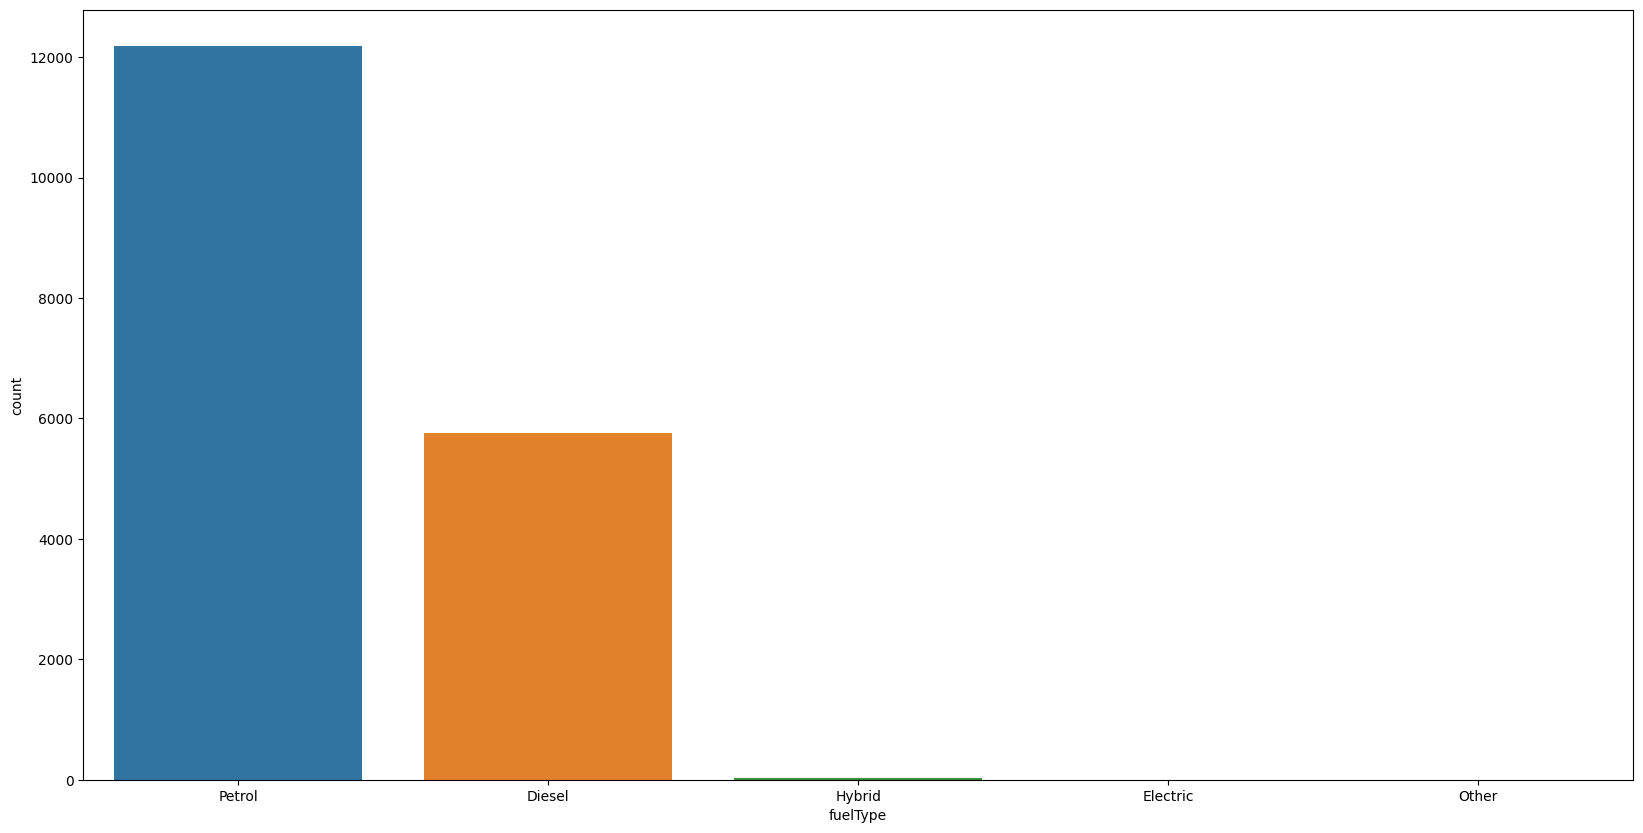

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(df, x = 'fuelType')

In [22]:
df.duplicated().sum()

154

In [23]:
df = df.drop_duplicates()

In [24]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000
mean,2016.859974,12269.880523,23379.381955,113.309865,57.909545,1.350620
std,2.026478,4736.220719,19418.128363,62.032540,10.132348,0.432593
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11289.000000,18274.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31092.500000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# **Label Encoder**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17811 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17811 non-null  object 
 1   year          17811 non-null  int64  
 2   price         17811 non-null  int64  
 3   transmission  17811 non-null  object 
 4   mileage       17811 non-null  int64  
 5   fuelType      17811 non-null  object 
 6   tax           17811 non-null  int64  
 7   mpg           17811 non-null  float64
 8   engineSize    17811 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

model = df['model']

encoded_model = label_encoder.fit_transform(model)

df['encoded_model'] = encoded_model

In [27]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,encoded_model
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,5
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,6
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,6
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,5


In [28]:
df.shape


(17811, 10)

In [29]:
df.drop('model', axis=1, inplace=True)

In [30]:
df.shape

(17811, 9)

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

transmission = df['transmission']

encoded_transmission = label_encoder.fit_transform(transmission)

df['encoded_transmission'] = encoded_transmission

In [32]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,encoded_model,encoded_transmission
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,5,0
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0,6,1
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0,6,1
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5,5,1
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,5,0


In [33]:
df.drop('transmission', axis = 1, inplace = True)

In [34]:
df.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,encoded_model,encoded_transmission
0,2017,12000,15944,Petrol,150,57.7,1.0,5,0
1,2018,14000,9083,Petrol,150,57.7,1.0,6,1
2,2017,13000,12456,Petrol,150,57.7,1.0,6,1
3,2019,17500,10460,Petrol,145,40.3,1.5,5,1
4,2019,16500,1482,Petrol,145,48.7,1.0,5,0


In [35]:
fuelType = df['fuelType']

encoded_fuelType = label_encoder.fit_transform(fuelType)

df['encoded_fuelType'] = encoded_fuelType

In [36]:
df.drop('fuelType', axis = 1, inplace = True)

In [37]:
df.head()

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
0,2017,12000,15944,150,57.7,1.0,5,0,4
1,2018,14000,9083,150,57.7,1.0,6,1,4
2,2017,13000,12456,150,57.7,1.0,6,1,4
3,2019,17500,10460,145,40.3,1.5,5,1,4
4,2019,16500,1482,145,48.7,1.0,5,0,4


In [38]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
year,1.000000,0.645236,-0.719636,0.299192,-0.020195,-0.139458,0.031419,-0.014566,0.088444
price,0.645236,1.000000,-0.530433,0.406112,-0.346401,0.411476,0.316099,-0.058800,-0.201938
mileage,-0.719636,-0.530433,1.000000,-0.257712,0.117849,0.214698,0.076776,0.017233,-0.257353
tax,0.299192,0.406112,-0.257712,1.000000,-0.502282,0.185360,0.185237,-0.053207,0.129170
mpg,-0.020195,-0.346401,0.117849,-0.502282,1.000000,-0.262246,-0.224528,0.056083,-0.297105
engineSize,-0.139458,0.411476,0.214698,0.185360,-0.262246,1.000000,0.499679,-0.026222,-0.643434
encoded_model,0.031419,0.316099,0.076776,0.185237,-0.224528,0.499679,1.000000,-0.064771,-0.387281
encoded_transmission,-0.014566,-0.058800,0.017233,-0.053207,0.056083,-0.026222,-0.064771,1.000000,-0.005223
encoded_fuelType,0.088444,-0.201938,-0.257353,0.129170,-0.297105,-0.643434,-0.387281,-0.005223,1.000000


In [39]:
df.corr()['price'].sort_values()

mileage                -0.530433
mpg                    -0.346401
encoded_fuelType       -0.201938
encoded_transmission   -0.058800
encoded_model           0.316099
tax                     0.406112
engineSize              0.411476
year                    0.645236
price                   1.000000
Name: price, dtype: float64

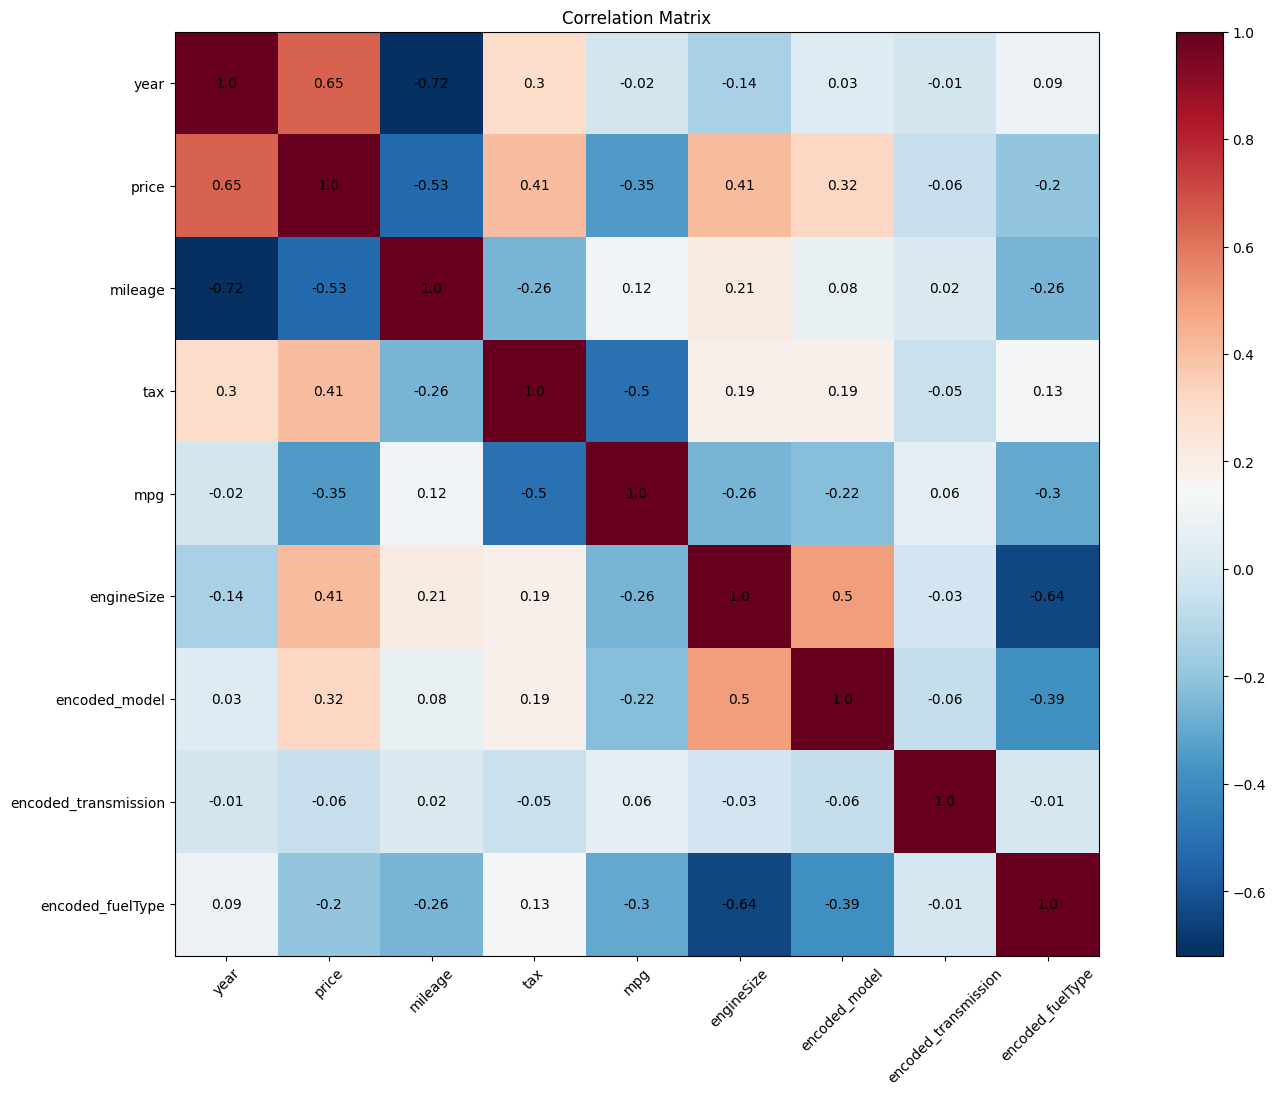

In [40]:
plt.figure(figsize=(20,12)) 
heatmap = plt.imshow(df.corr(), cmap='RdBu_r', interpolation='nearest')  
plt.colorbar(heatmap) 
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=45) 
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)  
plt.title('Correlation Matrix') 


for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        plt.text(j, i, round(df.corr().iloc[i, j], 2), ha='center', va='center', color='black')



<Axes: xlabel='mileage', ylabel='price'>

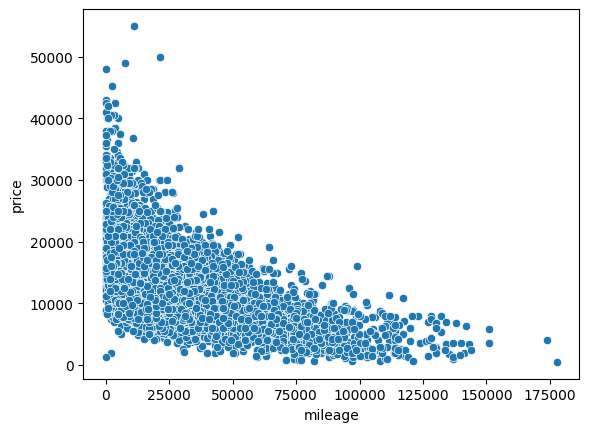

In [41]:
sns.scatterplot(data = df, x = 'mileage', y= 'price')

In [42]:
df.sort_values("price", ascending = False).head(20) 

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
11912,2018,54995,11000,145,36.7,2.3,6,1,4
11913,2017,49999,21575,145,20.9,5.0,15,1,4
11910,2017,48999,7546,145,23.5,5.0,15,0,4
17866,2020,48000,50,145,23.9,5.0,15,1,4
12613,2019,45250,2500,145,22.1,5.0,15,0,4
10901,2020,42999,10,145,23.7,5.0,15,1,4
12996,2019,42500,226,145,22.1,5.0,15,0,4
302,2020,42489,3500,145,22.1,5.0,15,0,4
13431,2019,42000,756,150,22.6,5.0,15,2,4
12600,2020,41000,100,145,22.8,5.0,15,1,4


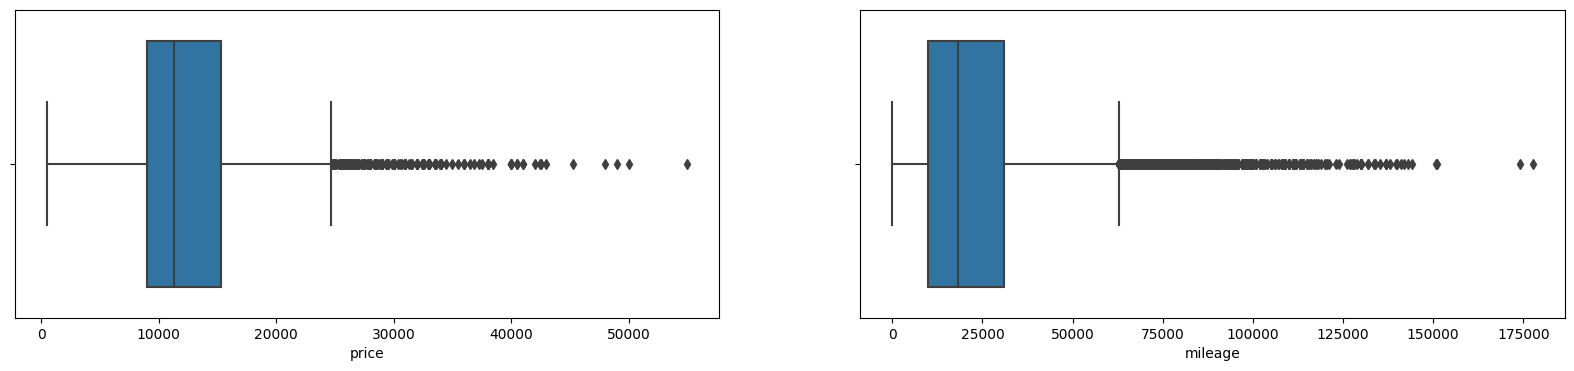

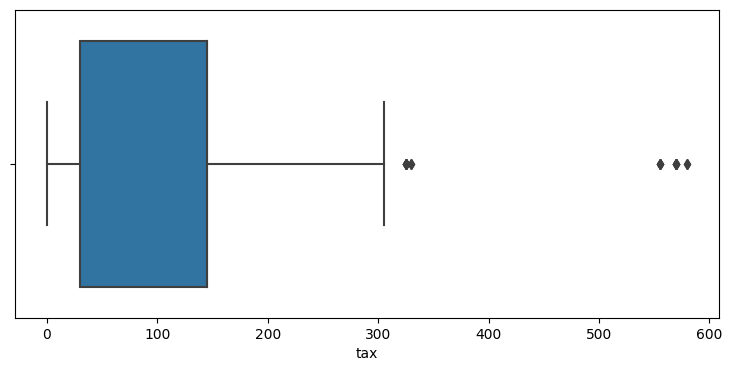

In [43]:
numerical = ['price','mileage',	'tax']

for i in range(0, len(numerical), 2):  
    plt.figure(figsize=(20, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=numerical[i], data=df)
    
    if i + 1 < len(numerical): 
        plt.subplot(1, 2, 2)
        sns.boxplot(x=numerical[i + 1], data=df)
    
    plt.show()

In [44]:
std_dev = df['price'].std()
mean = df['price'].mean()


lower_limit = mean - 3 * std_dev  
upper_limit = mean + 3 * std_dev  


filtered_df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

filtered_df.head()

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
0,2017,12000,15944,150,57.7,1.0,5,0,4
1,2018,14000,9083,150,57.7,1.0,6,1,4
2,2017,13000,12456,150,57.7,1.0,6,1,4
3,2019,17500,10460,145,40.3,1.5,5,1,4
4,2019,16500,1482,145,48.7,1.0,5,0,4


In [45]:
filtered_df.describe()

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
count,17635.000000,17635.000000,17635.000000,17635.000000,17635.000000,17635.000000,17635.000000,17635.000000,17635.000000
mean,2016.840885,12076.558151,23552.134222,112.834817,58.082762,1.336360,6.811965,0.984293,2.723164
std,2.025603,4315.088683,19427.634765,61.666295,9.589533,0.390727,3.972404,0.361986,1.863562
min,1996.000000,495.000000,1.000000,0.000000,20.900000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8998.000000,10147.000000,30.000000,53.300000,1.000000,5.000000,1.000000,0.000000
50%,2017.000000,11200.000000,18472.000000,145.000000,58.900000,1.200000,6.000000,1.000000,4.000000
75%,2018.000000,15000.000000,31292.500000,145.000000,65.700000,1.500000,8.000000,1.000000,4.000000
max,2020.000000,26475.000000,177644.000000,570.000000,88.300000,5.000000,23.000000,2.000000,4.000000


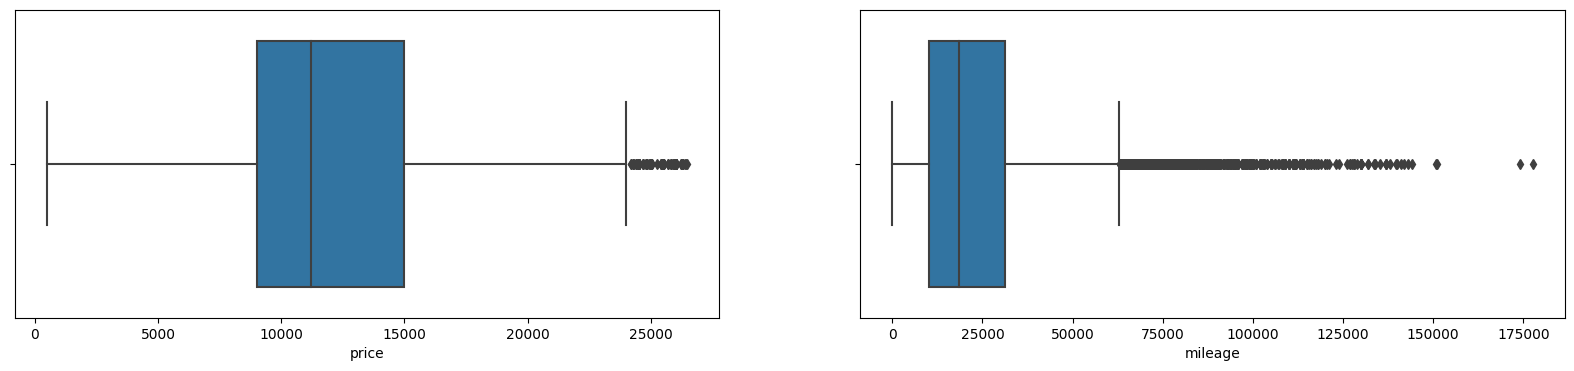

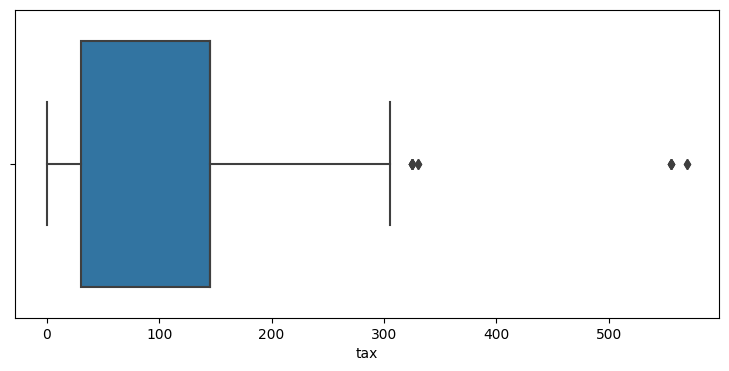

In [46]:
numerical = ['price','mileage',	'tax']

for i in range(0, len(numerical), 2):  
    plt.figure(figsize=(20, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=numerical[i], data=filtered_df)
    
    if i + 1 < len(numerical): 
        plt.subplot(1, 2, 2)
        sns.boxplot(x=numerical[i + 1], data=filtered_df)
    
    plt.show()

In [47]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,encoded_model,encoded_transmission,encoded_fuelType
count,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000
mean,2016.859974,12269.880523,23379.381955,113.309865,57.909545,1.350620,6.845264,0.984392,2.715681
std,2.026478,4736.220719,19418.128363,62.032540,10.132348,0.432593,4.008970,0.368896,1.866159
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000,5.000000,1.000000,0.000000
50%,2017.000000,11289.000000,18274.000000,145.000000,58.900000,1.200000,6.000000,1.000000,4.000000
75%,2018.000000,15295.000000,31092.500000,145.000000,65.700000,1.500000,8.000000,1.000000,4.000000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000,23.000000,2.000000,4.000000


In [48]:
y = df['price'].values # prediction
x = df.drop("price", axis = 1).values #feature

In [49]:
y

array([12000, 14000, 13000, ...,  9999,  8299,  8299])

In [50]:
x

array([[2.0170e+03, 1.5944e+04, 1.5000e+02, ..., 5.0000e+00, 0.0000e+00,
        4.0000e+00],
       [2.0180e+03, 9.0830e+03, 1.5000e+02, ..., 6.0000e+00, 1.0000e+00,
        4.0000e+00],
       [2.0170e+03, 1.2456e+04, 1.5000e+02, ..., 6.0000e+00, 1.0000e+00,
        4.0000e+00],
       ...,
       [2.0150e+03, 7.0100e+03, 2.0000e+01, ..., 6.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0180e+03, 5.0070e+03, 1.4500e+02, ..., 1.1000e+01, 1.0000e+00,
        4.0000e+00],
       [2.0150e+03, 5.0070e+03, 2.2000e+01, ..., 2.3000e+01, 1.0000e+00,
        4.0000e+00]])

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
print("x train size:", len(x_train))
print("x test size:", len(x_test))

x train size: 12467
x test size: 5344


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-05-05 12:37:42.057413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 12:37:42.057650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 12:37:42.217236: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [55]:
x_train.shape

(12467, 8)

In [56]:
model = Sequential()

model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [57]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 250, epochs = 250)

Epoch 1/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 171184352.0000 - val_loss: 173932528.0000
Epoch 2/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171320544.0000 - val_loss: 173725520.0000
Epoch 3/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173166560.0000 - val_loss: 172219888.0000
Epoch 4/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170311296.0000 - val_loss: 163258064.0000
Epoch 5/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155891632.0000 - val_loss: 127290064.0000
Epoch 6/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109087128.0000 - val_loss: 50926624.0000
Epoch 7/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37502432.0000 - val_loss: 22229640.0000
Epoch 8/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21853226.0000 - val_loss: 21745830.0000
Epoch 9/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21209560.0000 - val_loss: 21277650.0000
Epoch 10/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21248582.0000 - val_loss: 20824972.000

In [58]:
loss_data = pd.DataFrame(model.history.history)

In [59]:
loss_data

,loss,val_loss
0,1.725467e+08,1.739325e+08
1,1.724610e+08,1.737255e+08
2,1.718214e+08,1.722199e+08
3,1.676194e+08,1.632581e+08
4,1.478580e+08,1.272901e+08
...,...,...
245,4.108020e+06,3.999192e+06
246,4.099101e+06,4.047115e+06
247,4.106968e+06,3.990916e+06
248,4.099736e+06,3.990350e+06


<Axes: >

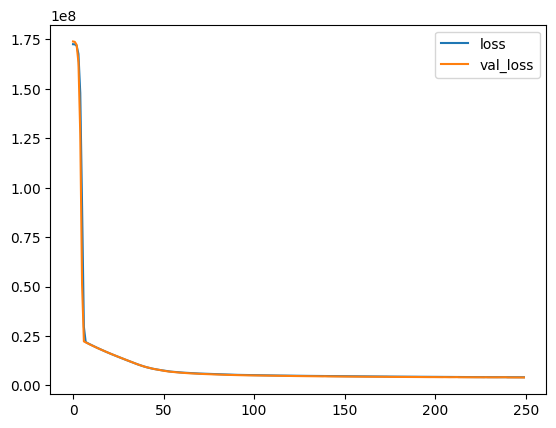

In [60]:
loss_data.plot()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
prediction_array = model.predict(x_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [63]:
mae = mean_absolute_error(y_test, prediction_array)
print(mae)
accuracy_ratio = 1 - mae / (max(y_train) - min(y_train))
print(accuracy_ratio)

1420.0057314341655
0.9739448489645107


**Mean Absolue Error: 1538**
<br>
**Accuracy Ratio: 97%**

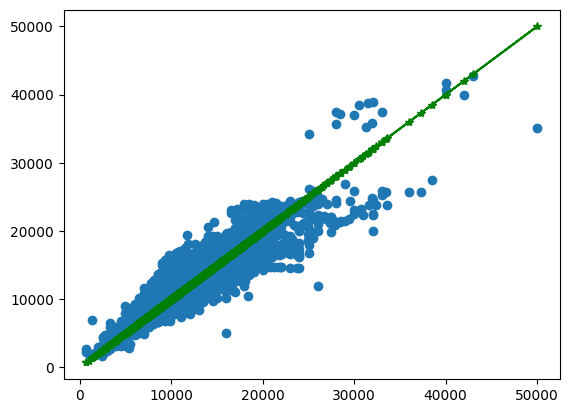

In [64]:
plt.scatter(y_test, prediction_array)
plt.plot(y_test, y_test, "g*-")

Text(0.5, 1.0, 'Model Accuracy')

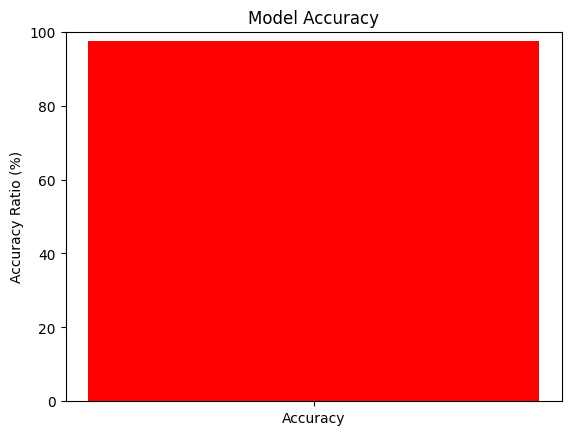

In [65]:
plt.bar(["Accuracy"], [accuracy_ratio*100], color=['Red'])
plt.ylim(0, 100)  
plt.ylabel('Accuracy Ratio (%)')
plt.title('Model Accuracy')